In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import re
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Madrid 2017

In [332]:
a=pd.read_csv(r"C:\Users\user\Downloads\C10_air\madrid_2017.csv")
a

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2017-06-01 01:00:00,NaN,NaN,0.3,NaN,NaN,4.0,38.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,28079004
1,2017-06-01 01:00:00,0.6,NaN,0.3,0.4,0.08,3.0,39.0,NaN,71.0,22.0,9.0,7.0,1.4,2.9,28079008
2,2017-06-01 01:00:00,0.2,NaN,NaN,0.1,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9,28079011
3,2017-06-01 01:00:00,NaN,NaN,0.2,NaN,NaN,1.0,9.0,NaN,91.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2017-06-01 01:00:00,NaN,NaN,NaN,NaN,NaN,1.0,19.0,NaN,69.0,NaN,NaN,2.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210115,2017-08-01 00:00:00,NaN,NaN,0.2,NaN,NaN,1.0,27.0,NaN,65.0,NaN,NaN,NaN,NaN,NaN,28079056
210116,2017-08-01 00:00:00,NaN,NaN,0.2,NaN,NaN,1.0,14.0,NaN,NaN,73.0,NaN,7.0,NaN,NaN,28079057
210117,2017-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,83.0,NaN,NaN,NaN,NaN,NaN,28079058
210118,2017-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.0,11.0,NaN,78.0,NaN,NaN,NaN,NaN,NaN,28079059


In [333]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210120 entries, 0 to 210119
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     210120 non-null  object 
 1   BEN      50201 non-null   float64
 2   CH4      6410 non-null    float64
 3   CO       87001 non-null   float64
 4   EBE      49973 non-null   float64
 5   NMHC     25472 non-null   float64
 6   NO       209065 non-null  float64
 7   NO_2     209065 non-null  float64
 8   NOx      52818 non-null   float64
 9   O_3      121398 non-null  float64
 10  PM10     104141 non-null  float64
 11  PM25     52023 non-null   float64
 12  SO_2     86803 non-null   float64
 13  TCH      25472 non-null   float64
 14  TOL      50117 non-null   float64
 15  station  210120 non-null  int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 25.6+ MB


In [334]:
b=a.fillna(value=87)
b

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2017-06-01 01:00:00,87.0,87.0,0.3,87.0,87.00,4.0,38.0,87.0,87.0,87.0,87.0,5.0,87.0,87.0,28079004
1,2017-06-01 01:00:00,0.6,87.0,0.3,0.4,0.08,3.0,39.0,87.0,71.0,22.0,9.0,7.0,1.4,2.9,28079008
2,2017-06-01 01:00:00,0.2,87.0,87.0,0.1,87.00,1.0,14.0,87.0,87.0,87.0,87.0,87.0,87.0,0.9,28079011
3,2017-06-01 01:00:00,87.0,87.0,0.2,87.0,87.00,1.0,9.0,87.0,91.0,87.0,87.0,87.0,87.0,87.0,28079016
4,2017-06-01 01:00:00,87.0,87.0,87.0,87.0,87.00,1.0,19.0,87.0,69.0,87.0,87.0,2.0,87.0,87.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210115,2017-08-01 00:00:00,87.0,87.0,0.2,87.0,87.00,1.0,27.0,87.0,65.0,87.0,87.0,87.0,87.0,87.0,28079056
210116,2017-08-01 00:00:00,87.0,87.0,0.2,87.0,87.00,1.0,14.0,87.0,87.0,73.0,87.0,7.0,87.0,87.0,28079057
210117,2017-08-01 00:00:00,87.0,87.0,87.0,87.0,87.00,1.0,4.0,87.0,83.0,87.0,87.0,87.0,87.0,87.0,28079058
210118,2017-08-01 00:00:00,87.0,87.0,87.0,87.0,87.00,1.0,11.0,87.0,78.0,87.0,87.0,87.0,87.0,87.0,28079059


In [335]:
b.columns

Index(['date', 'BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'NOx', 'O_3',
       'PM10', 'PM25', 'SO_2', 'TCH', 'TOL', 'station'],
      dtype='object')

In [336]:
c=b.head(10)
c

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2017-06-01 01:00:00,87.0,87.0,0.3,87.0,87.00,4.0,38.0,87.0,87.0,87.0,87.0,5.0,87.00,87.0,28079004
1,2017-06-01 01:00:00,0.6,87.0,0.3,0.4,0.08,3.0,39.0,87.0,71.0,22.0,9.0,7.0,1.40,2.9,28079008
2,2017-06-01 01:00:00,0.2,87.0,87.0,0.1,87.00,1.0,14.0,87.0,87.0,87.0,87.0,87.0,87.00,0.9,28079011
3,2017-06-01 01:00:00,87.0,87.0,0.2,87.0,87.00,1.0,9.0,87.0,91.0,87.0,87.0,87.0,87.00,87.0,28079016
4,2017-06-01 01:00:00,87.0,87.0,87.0,87.0,87.00,1.0,19.0,87.0,69.0,87.0,87.0,2.0,87.00,87.0,28079017
5,2017-06-01 01:00:00,0.1,87.0,0.3,0.2,87.00,1.0,26.0,87.0,70.0,26.0,87.0,1.0,87.00,0.3,28079018
6,2017-06-01 01:00:00,0.3,87.0,0.2,0.1,0.17,1.0,19.0,87.0,79.0,23.0,9.0,3.0,0.86,1.8,28079024
7,2017-06-01 01:00:00,87.0,87.0,87.0,87.0,87.00,1.0,9.0,87.0,87.0,87.0,87.0,87.0,87.00,87.0,28079027
8,2017-06-01 01:00:00,87.0,87.0,0.3,87.0,87.00,3.0,30.0,87.0,70.0,87.0,87.0,87.0,87.00,87.0,28079035
9,2017-06-01 01:00:00,87.0,87.0,0.1,87.0,87.00,1.0,15.0,87.0,87.0,22.0,87.0,10.0,87.00,87.0,28079036


In [337]:
d=c[['BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25',
       'SO_2', 'TCH', 'TOL', 'station']]
d

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,87.0,0.3,87.0,87.00,4.0,38.0,87.0,87.0,87.0,5.0,87.00,87.0,28079004
1,0.6,0.3,0.4,0.08,3.0,39.0,71.0,22.0,9.0,7.0,1.40,2.9,28079008
2,0.2,87.0,0.1,87.00,1.0,14.0,87.0,87.0,87.0,87.0,87.00,0.9,28079011
3,87.0,0.2,87.0,87.00,1.0,9.0,91.0,87.0,87.0,87.0,87.00,87.0,28079016
4,87.0,87.0,87.0,87.00,1.0,19.0,69.0,87.0,87.0,2.0,87.00,87.0,28079017
5,0.1,0.3,0.2,87.00,1.0,26.0,70.0,26.0,87.0,1.0,87.00,0.3,28079018
6,0.3,0.2,0.1,0.17,1.0,19.0,79.0,23.0,9.0,3.0,0.86,1.8,28079024
7,87.0,87.0,87.0,87.00,1.0,9.0,87.0,87.0,87.0,87.0,87.00,87.0,28079027
8,87.0,0.3,87.0,87.00,3.0,30.0,70.0,87.0,87.0,87.0,87.00,87.0,28079035
9,87.0,0.1,87.0,87.00,1.0,15.0,87.0,22.0,87.0,10.0,87.00,87.0,28079036


In [338]:
x=d[['BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10']]
y=d['TCH']

In [339]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [340]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [341]:
print(lr.intercept_)

-1.476452526917285


In [342]:
coeff=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff

,Co-efficient
BEN,0.000568
CO,0.013192
EBE,0.001709
NMHC,0.989427
NO,-0.001187
NO_2,0.039564
O_3,0.021980
PM10,-0.013985


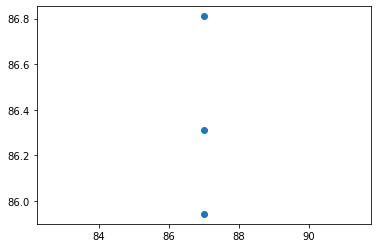

In [343]:
prediction=lr.predict(x_test)
plt.scatter(y_test,prediction)

In [344]:
print(lr.score(x_test,y_test))

0.0


In [345]:
from sklearn.linear_model import Ridge,Lasso

In [346]:
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [347]:
rr.score(x_test,y_test)

0.0

In [348]:
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [349]:
la.score(x_test,y_test)

0.0

In [350]:
a1=b.head(7000)
a1

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2017-06-01 01:00:00,87.0,87.0,0.3,87.0,87.00,4.0,38.0,87.0,87.0,87.0,87.0,5.0,87.0,87.0,28079004
1,2017-06-01 01:00:00,0.6,87.0,0.3,0.4,0.08,3.0,39.0,87.0,71.0,22.0,9.0,7.0,1.4,2.9,28079008
2,2017-06-01 01:00:00,0.2,87.0,87.0,0.1,87.00,1.0,14.0,87.0,87.0,87.0,87.0,87.0,87.0,0.9,28079011
3,2017-06-01 01:00:00,87.0,87.0,0.2,87.0,87.00,1.0,9.0,87.0,91.0,87.0,87.0,87.0,87.0,87.0,28079016
4,2017-06-01 01:00:00,87.0,87.0,87.0,87.0,87.00,1.0,19.0,87.0,69.0,87.0,87.0,2.0,87.0,87.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,2017-06-13 06:00:00,87.0,87.0,0.2,87.0,87.00,1.0,9.0,87.0,84.0,87.0,87.0,87.0,87.0,87.0,28079039
6996,2017-06-13 06:00:00,87.0,87.0,87.0,87.0,87.00,1.0,13.0,87.0,87.0,7.0,87.0,9.0,87.0,87.0,28079040
6997,2017-06-13 06:00:00,87.0,87.0,87.0,87.0,87.00,1.0,11.0,87.0,87.0,20.0,17.0,87.0,87.0,87.0,28079047
6998,2017-06-13 06:00:00,87.0,87.0,87.0,87.0,87.00,1.0,2.0,87.0,87.0,8.0,4.0,87.0,87.0,87.0,28079048


In [351]:
e=a1[['BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25',
       'SO_2', 'TCH', 'TOL', 'station']]
e

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,87.0,0.3,87.0,87.00,4.0,38.0,87.0,87.0,87.0,5.0,87.0,87.0,28079004
1,0.6,0.3,0.4,0.08,3.0,39.0,71.0,22.0,9.0,7.0,1.4,2.9,28079008
2,0.2,87.0,0.1,87.00,1.0,14.0,87.0,87.0,87.0,87.0,87.0,0.9,28079011
3,87.0,0.2,87.0,87.00,1.0,9.0,91.0,87.0,87.0,87.0,87.0,87.0,28079016
4,87.0,87.0,87.0,87.00,1.0,19.0,69.0,87.0,87.0,2.0,87.0,87.0,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,87.0,0.2,87.0,87.00,1.0,9.0,84.0,87.0,87.0,87.0,87.0,87.0,28079039
6996,87.0,87.0,87.0,87.00,1.0,13.0,87.0,7.0,87.0,9.0,87.0,87.0,28079040
6997,87.0,87.0,87.0,87.00,1.0,11.0,87.0,20.0,17.0,87.0,87.0,87.0,28079047
6998,87.0,87.0,87.0,87.00,1.0,2.0,87.0,8.0,4.0,87.0,87.0,87.0,28079048


In [352]:
f=e.iloc[:,0:14]
g=e.iloc[:,-1]

In [353]:
h=StandardScaler().fit_transform(f)

In [354]:
logr=LogisticRegression(max_iter=10000)
logr.fit(h,g)

LogisticRegression(max_iter=10000)

In [355]:
from sklearn.model_selection import train_test_split

h_train,h_test,g_train,g_test=train_test_split(h,g,test_size=0.3)

In [356]:
i=[[10,20,30,40,50,60,11,22,33,44,55,54,21]]

In [357]:
prediction=logr.predict(i)
print(prediction)

[28079059]


In [358]:
logr.predict_proba(i)[0][0]

1.0607448724098052e-191

In [359]:
logr.score(h_test,g_test)

0.9376190476190476

In [360]:
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [361]:
prediction=en.predict(x_test)
print(en.score(x_test,y_test))

0.0


In [362]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(h_train,g_train)

RandomForestClassifier()

In [363]:
parameters={'max_depth':[1,2,3,4,5],
           'min_samples_leaf':[5,10,15,20,25],
           'n_estimators':[10,20,30,40,50]
           }

In [364]:
from sklearn.model_selection import GridSearchCV

grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(h_train,g_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [365]:
grid_search.best_score_

0.9838775510204082

In [366]:
rfc_best=grid_search.best_estimator_

[Text(837.0, 498.3, 'X[9] <= -1.182\ngini = 0.958\nsamples = 3115\nvalue = [193, 211, 189, 187, 248, 245, 166, 209, 185, 220\n171, 203, 196, 204, 207, 223, 195, 213, 203, 221\n200, 205, 216, 190]'),
 Text(317.48275862068965, 407.70000000000005, 'X[8] <= -0.47\ngini = 0.828\nsamples = 760\nvalue = [179, 0, 0, 0, 248, 241, 152, 0, 1, 0, 171, 0\n0, 0, 0, 0, 0, 0, 0, 0, 197, 0, 0, 0]'),
 Text(115.44827586206897, 317.1, 'X[12] <= -0.387\ngini = 0.498\nsamples = 217\nvalue = [0, 0, 0, 0, 0, 0, 152, 0, 0, 0, 171, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(57.724137931034484, 226.5, 'gini = 0.0\nsamples = 98\nvalue = [0, 0, 0, 0, 0, 0, 152, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(173.17241379310346, 226.5, 'gini = 0.0\nsamples = 119\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 171, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(519.5172413793103, 317.1, 'X[7] <= 0.779\ngini = 0.746\nsamples = 543\nvalue = [179, 0, 0, 0, 248, 241, 0, 0, 1, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 1

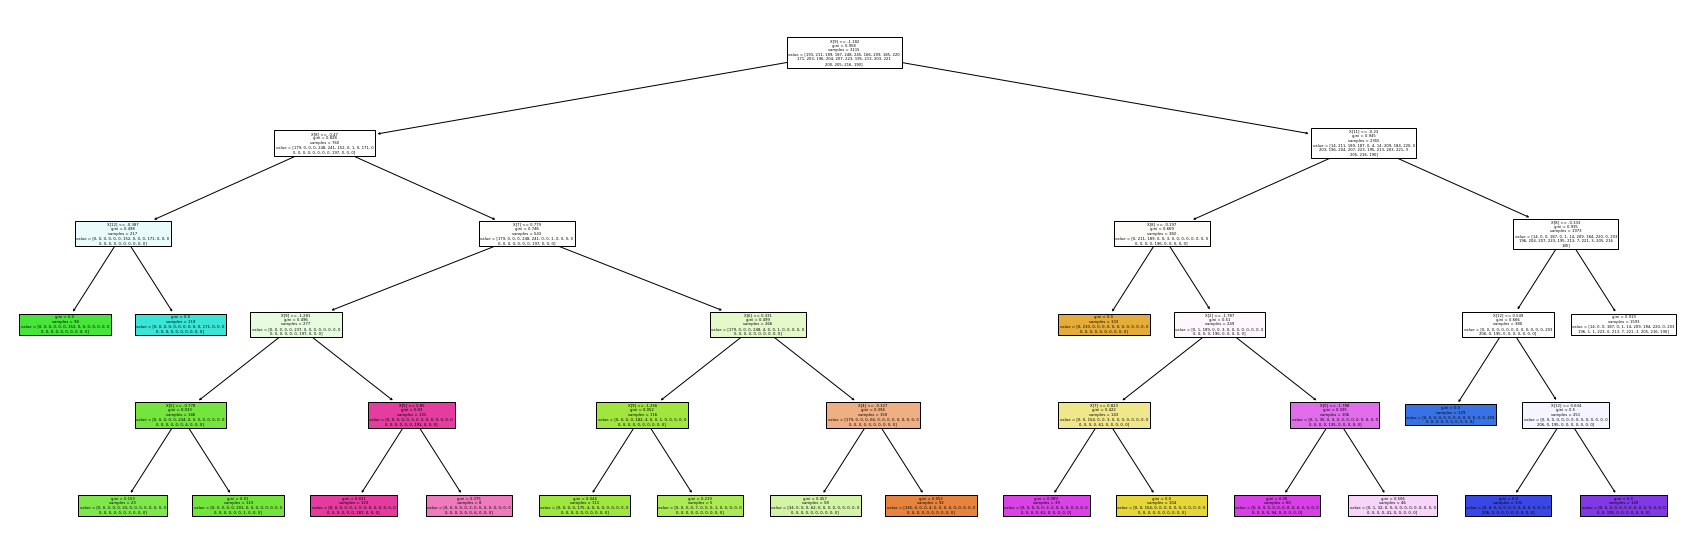

In [370]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30,10))
plot_tree(rfc_best.estimators_[2],filled=True)

Conclusion: RandomForest score=0.9838775510204082.It has the highest accuracy.

# Madrid 2018

In [371]:
a=pd.read_csv(r"C:\Users\user\Downloads\C10_air\madrid_201.csv")
a

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2018-03-01 01:00:00,NaN,NaN,0.3,NaN,NaN,1.0,29.0,31.0,NaN,NaN,NaN,2.0,NaN,NaN,28079004
1,2018-03-01 01:00:00,0.5,1.39,0.3,0.2,0.02,6.0,40.0,49.0,52.0,5.0,4.0,3.0,1.41,0.8,28079008
2,2018-03-01 01:00:00,0.4,NaN,NaN,0.2,NaN,4.0,41.0,47.0,NaN,NaN,NaN,NaN,NaN,1.1,28079011
3,2018-03-01 01:00:00,NaN,NaN,0.3,NaN,NaN,1.0,35.0,37.0,54.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2018-03-01 01:00:00,NaN,NaN,NaN,NaN,NaN,1.0,27.0,29.0,49.0,NaN,NaN,3.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69091,2018-02-01 00:00:00,NaN,NaN,0.5,NaN,NaN,66.0,91.0,192.0,1.0,35.0,22.0,NaN,NaN,NaN,28079056
69092,2018-02-01 00:00:00,NaN,NaN,0.7,NaN,NaN,87.0,107.0,241.0,NaN,29.0,NaN,15.0,NaN,NaN,28079057
69093,2018-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,28.0,48.0,91.0,2.0,NaN,NaN,NaN,NaN,NaN,28079058
69094,2018-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,141.0,103.0,320.0,2.0,NaN,NaN,NaN,NaN,NaN,28079059


In [372]:
a=a.head(1000)
a

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2018-03-01 01:00:00,NaN,NaN,0.3,NaN,NaN,1.0,29.0,31.0,NaN,NaN,NaN,2.0,NaN,NaN,28079004
1,2018-03-01 01:00:00,0.5,1.39,0.3,0.2,0.02,6.0,40.0,49.0,52.0,5.0,4.0,3.0,1.41,0.8,28079008
2,2018-03-01 01:00:00,0.4,NaN,NaN,0.2,NaN,4.0,41.0,47.0,NaN,NaN,NaN,NaN,NaN,1.1,28079011
3,2018-03-01 01:00:00,NaN,NaN,0.3,NaN,NaN,1.0,35.0,37.0,54.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2018-03-01 01:00:00,NaN,NaN,NaN,NaN,NaN,1.0,27.0,29.0,49.0,NaN,NaN,3.0,NaN,NaN,28079017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-03-02 18:00:00,NaN,NaN,0.4,NaN,NaN,13.0,62.0,83.0,31.0,NaN,NaN,NaN,NaN,NaN,28079039
996,2018-03-02 18:00:00,NaN,NaN,NaN,NaN,NaN,19.0,70.0,99.0,NaN,9.0,NaN,4.0,NaN,NaN,28079040
997,2018-03-02 18:00:00,NaN,NaN,NaN,NaN,NaN,42.0,88.0,152.0,NaN,3.0,2.0,NaN,NaN,NaN,28079047
998,2018-03-02 18:00:00,NaN,NaN,NaN,NaN,NaN,20.0,69.0,100.0,NaN,11.0,10.0,NaN,NaN,NaN,28079048


In [373]:
b=a.dropna()
b

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
1,2018-03-01 01:00:00,0.5,1.39,0.3,0.2,0.02,6.0,40.0,49.0,52.0,5.0,4.0,3.0,1.41,0.8,28079008
6,2018-03-01 01:00:00,0.4,1.11,0.2,0.1,0.06,1.0,25.0,27.0,55.0,5.0,4.0,4.0,1.16,1.4,28079024
25,2018-03-01 02:00:00,0.4,1.42,0.2,0.1,0.01,4.0,26.0,32.0,64.0,4.0,4.0,3.0,1.44,0.7,28079008
30,2018-03-01 02:00:00,0.3,1.10,0.2,0.1,0.05,1.0,12.0,13.0,69.0,5.0,4.0,4.0,1.14,0.8,28079024
49,2018-03-01 03:00:00,0.3,1.41,0.2,0.1,0.01,3.0,16.0,20.0,68.0,3.0,2.0,3.0,1.42,0.4,28079008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2018-03-02 16:00:00,0.7,1.11,0.3,0.2,0.07,8.0,65.0,77.0,24.0,5.0,4.0,4.0,1.18,2.7,28079024
961,2018-03-02 17:00:00,1.3,1.44,0.6,0.5,0.10,51.0,100.0,178.0,12.0,13.0,10.0,6.0,1.54,4.2,28079008
966,2018-03-02 17:00:00,0.7,1.12,0.2,0.2,0.05,3.0,35.0,39.0,44.0,3.0,3.0,4.0,1.17,2.1,28079024
985,2018-03-02 18:00:00,1.1,1.49,0.5,0.4,0.09,61.0,101.0,195.0,13.0,5.0,3.0,6.0,1.58,3.3,28079008


In [374]:
b.columns

Index(['date', 'BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'NOx', 'O_3',
       'PM10', 'PM25', 'SO_2', 'TCH', 'TOL', 'station'],
      dtype='object')

In [375]:
b=b[['BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'PM10', 'PM25',
       'SO_2', 'TCH', 'TOL', 'station']]
b

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
1,0.5,0.3,0.2,0.02,6.0,40.0,52.0,5.0,4.0,3.0,1.41,0.8,28079008
6,0.4,0.2,0.1,0.06,1.0,25.0,55.0,5.0,4.0,4.0,1.16,1.4,28079024
25,0.4,0.2,0.1,0.01,4.0,26.0,64.0,4.0,4.0,3.0,1.44,0.7,28079008
30,0.3,0.2,0.1,0.05,1.0,12.0,69.0,5.0,4.0,4.0,1.14,0.8,28079024
49,0.3,0.2,0.1,0.01,3.0,16.0,68.0,3.0,2.0,3.0,1.42,0.4,28079008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,0.7,0.3,0.2,0.07,8.0,65.0,24.0,5.0,4.0,4.0,1.18,2.7,28079024
961,1.3,0.6,0.5,0.10,51.0,100.0,12.0,13.0,10.0,6.0,1.54,4.2,28079008
966,0.7,0.2,0.2,0.05,3.0,35.0,44.0,3.0,3.0,4.0,1.17,2.1,28079024
985,1.1,0.5,0.4,0.09,61.0,101.0,13.0,5.0,3.0,6.0,1.58,3.3,28079008


In [376]:
x=b.iloc[:,0:10]
y=b.iloc[:,-1]

In [377]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [378]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [379]:
print(lr.score(x_test,y_test))

0.896876092904291


In [380]:
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [381]:
rr.score(x_test,y_test)

0.6516427007791514

In [382]:
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [383]:
la.score(x_test,y_test)

0.31762346092204297

In [384]:
from sklearn.linear_model import ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)

ElasticNet()

In [385]:
prediction=en.predict(x_test)
print(en.score(x_test,y_test))

0.5618084359685428


In [386]:
f=StandardScaler().fit_transform(x)

In [387]:
logr=LogisticRegression()
logr.fit(f,y)

LogisticRegression()

In [388]:
g=[[10,20,30,40,50,60,70,80,90,10]]

In [389]:
prediction=logr.predict(g)
print(prediction)

[28079008]


In [390]:
logr.predict_proba(g)[0][0]

1.0

In [391]:
logr.score(x_test,y_test)

0.56

In [392]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [393]:
parameters={'max_depth':[1,2,3,4,5],
           'min_samples_leaf':[5,10,15,20,25],
           'n_estimators':[10,20,30,40,50]
           }

In [394]:
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [398]:
grid_search.best_score_

0.9310344827586208

In [399]:
rfc_best=grid_search.best_estimator_

[Text(279.0, 407.70000000000005, 'X[0] <= 0.65\ngini = 0.495\nsamples = 36\nvalue = [32, 26]'),
 Text(139.5, 135.89999999999998, 'gini = 0.337\nsamples = 19\nvalue = [6, 22]'),
 Text(418.5, 135.89999999999998, 'gini = 0.231\nsamples = 17\nvalue = [26, 4]')]

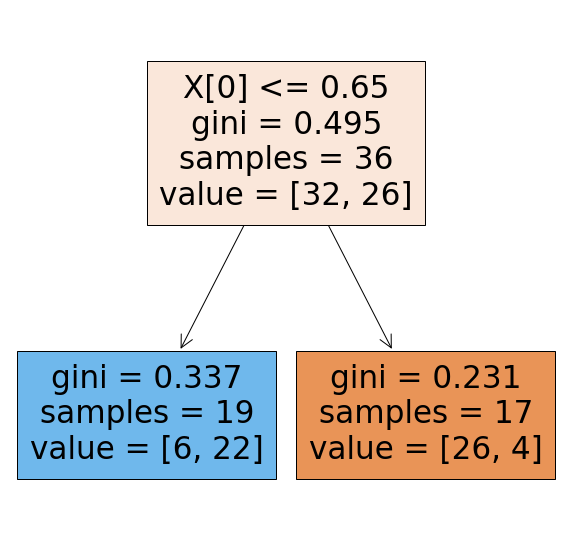

In [402]:
plt.figure(figsize=(10,10))
plot_tree(rfc_best.estimators_[2],filled=True)

Conclusion: RandomForest score=0.9310344827586208.It has the highest accuracy.